In [126]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib tk
angle=10
class Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=4
        self.gy=4
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=vect
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
    def Draw_Grid_Projection(self):
        ix=np.array([1,0],dtype=np.float64)
        iy=np.array([0,1],dtype=np.float64)
        nix=self.mul_pts(ix)
        niy=self.mul_pts(iy)
        self.Draw_Projection(nix[0],nix[1])
        self.Draw_Projection(niy[0],niy[1])
        self.ax.plot([nix[0]],[nix[1]],'go')
        self.ax.plot([niy[0]],[niy[1]],'go')
        return 0
    def Draw_Projection(self,vx,vy):
        ang=np.tan(self.vect[1][1]/self.vect[1][0])
        ax1_x=vx#*np.cos(ang)
        ax1_y=0#*np.sin(ang)
        ax2_x=0#*np.cos(ang)
        ax2_y=vy#*np.sin(ang)
        self.ax.plot([vx,ax1_x],[vy,ax1_y],'g--')
        self.ax.plot([vx,ax2_x],[vy,ax2_y],'g--')
        return [ax1_x,ax1_y],[ax2_x,ax2_y]
    def Draw(self):
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        for xx,yy in zip(self.Xs,self.Ys):
            #print(xx)
            self.ax.plot(xx[:,0],xx[:,1],marker+'--')
            self.ax.plot(yy[:,0],yy[:,1],marker+'--')
        
        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        for txx,tyy in zip(self.txx,self.tyy):
            self.ax.plot(txx[:,0],txx[:,1],marker+'--')
            self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        self.Draw_Grid_Projection()
        plt.show()

    
    def _Box(self):
        cx=self.ox
        cy=self.oy
        dx=1
        dy=1
        pts=[[cx-dx,cy+dy],
        [cx+dx,cy+dy],
        [cx+dx,cy-dy],
        [cx-dx,cy-dy],
        [cx-dx,cy+dy]]
        self.box=np.array(pts,dtype=np.float64)
        return self.box
    def _Axis(self):
        cx=self.ox
        cy=self.oy
        gx=self.gx
        gy=self.gy
        ax1=[[cx-gx//2,cy],
        [cx+gx//2,cy]]
        ax2=[[cx,cy-gy//2],
        [cx,cy+gy//2]]
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        gx=self.gx
        gy=self.gy
        for i in range(self.gx+1):
            ax1=[[self.ox-gx//2,_y],
                 [self.ox+gx//2,_y]]
            self.Xs.append(ax1)
            _y+=1
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-gy//2],
                 [_x,self.oy+gy//2]]
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def _mul_pts(self,source):
        points=source.copy()
        for i in range(len(points)):
            points[i]=points[i].dot(self.matrix)
        return points.copy()
    def mul_pts(self,source):
        points=source.copy()
        
        #points[i]=points[i].dot(self.matrix)
        points=np.matmul(self.matrix,points.T)
        points=points.T
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts(self.vect)
            self.tbox=self.mul_pts(self.box)
            self.TXaxis=self.mul_pts(self.Xaxis)
            self.TYaxis=self.mul_pts(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts(_xx))
                self.tyy.append(self.mul_pts(_yy))
            

            return 0

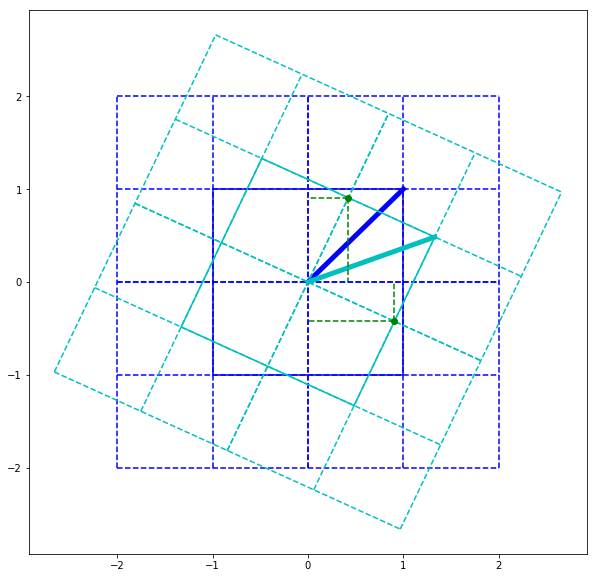

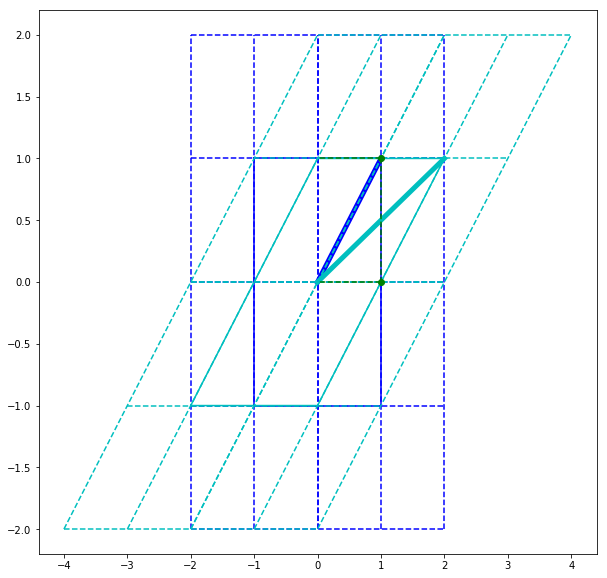

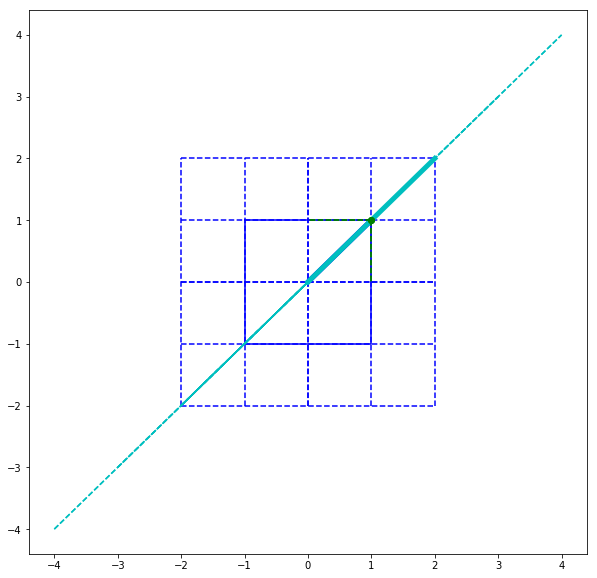

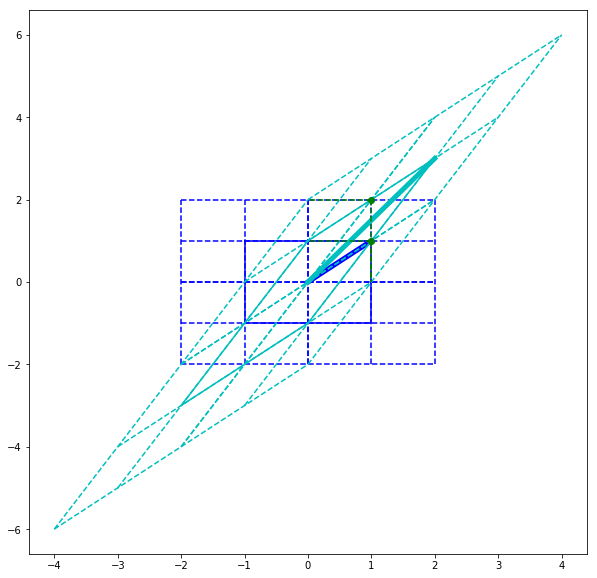

In [127]:

import time
#for i in range(1,90,10):    
#    lt=Linear_Transform(angle=i)
#    time.sleep(.1)
phi=np.deg2rad(25)
matrix1=np.array([[math.cos(phi),math.sin(phi)],
                [-math.sin(phi),math.cos(phi)]])
matrix2=np.array([[1 , 1],
                 [0 , 1]])
matrix3=np.array([[1 , 1],
                 [1 , 1]])
matrix4=np.array([[1 , 1],
                 [1 , 2]])
vect=[[0,0],
      [1,1]]
#vect=[[1,1]]
vect=np.array(vect,dtype=np.float64)
mats = [matrix1,matrix2,matrix3,matrix4]
for mat in mats:
    lt=Linear_Transform(vect,mat)

In [20]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib tk
angle=10
class Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=4
        self.gy=4
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=self.interpolate(vect)
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
        
    def Draw(self):
        grid=False
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker,alpha=0.5)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        if grid==True:
            for xx,yy in zip(self.Xs,self.Ys):
                #print(xx)
                self.ax.plot(xx[:,0],xx[:,1],marker+'--')
                self.ax.plot(yy[:,0],yy[:,1],marker+'--')

        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker,alpha=0.5)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        if grid==True:
            for txx,tyy in zip(self.txx,self.tyy):
                self.ax.plot(txx[:,0],txx[:,1],marker+'--')
                self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        plt.show()

    
    def _Box(self):
        dx=1
        dy=1
        pts=[[self.ox-dx,self.oy+dy],
        [self.ox+dx,self.oy+dy],
        [self.ox+dx,self.oy-dy],
        [self.ox-dx,self.oy-dy],
        [self.ox-dx,self.oy+dy]]
        _pts=self.interpolate([pts[0],pts[1]])
        _pts=np.concatenate((_pts,self.interpolate([pts[1],pts[2]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[2],pts[3]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[3],pts[4]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[4],pts[0]])))
        self.box=np.array(_pts,dtype=np.float64)
        return self.box
    def interpolate(self,pts,N=10):
        start=pts[0].copy()
        end=pts[-1].copy()
        xx=np.linspace(start[0],end[0],N)
        yy=np.linspace(start[1],end[1],N)
        curve=[]
        for x,y in zip(xx,yy):
            curve.append([x,y])
        curve=np.array(curve,dtype=np.float64)
        return curve
    def _Axis(self):
        ax1=[[self.ox-self.gx//2,self.oy],
        [self.ox+self.gx//2,self.oy]]
        ax2=[[self.ox,self.oy-self.gy//2],
        [self.ox,self.oy+self.gy//2]]
        ax1=self.interpolate(ax1,100)
        ax2=self.interpolate(ax2,100)
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        
        #y=a , where a range(-gy,+gy,1)//equation for line parallel to x axis
        for i in range(self.gx+1):
            ax1=[[self.ox-self.gx//2,_y],
                 [self.ox+self.gx//2,_y]]
            ax1=self.interpolate(ax1)
            self.Xs.append(ax1)
            _y+=1
        #x=a , where a range(-gx,+gx,1)
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-self.gy//2],
                 [_x,self.oy+self.gy//2]]
            ax2=self.interpolate(ax2)
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def mul_pts(self,source):
        points=source.copy()
        
        #points[i]=points[i].dot(self.matrix)
        points=np.matmul(self.matrix,points.T)
        points=points.T
        return points.copy()
    def mul_pts_nl(self,source):
        points=source.copy()
        for i in range(len(points)):
            mat=self.matrix(points[i][0],points[i][1])
            points[i]=np.matmul(mat,points[i])
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts_nl(self.vect)
            self.tbox=self.mul_pts_nl(self.box)
            self.TXaxis=self.mul_pts_nl(self.Xaxis)
            self.TYaxis=self.mul_pts_nl(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts_nl(_xx))
                self.tyy.append(self.mul_pts_nl(_yy))
            

            return 0

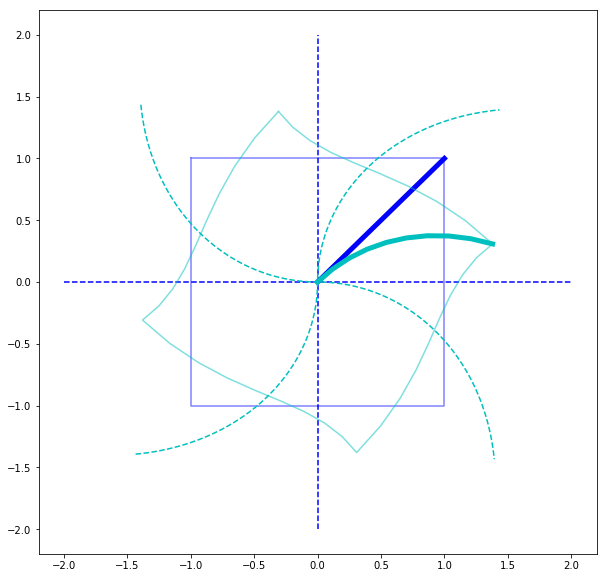

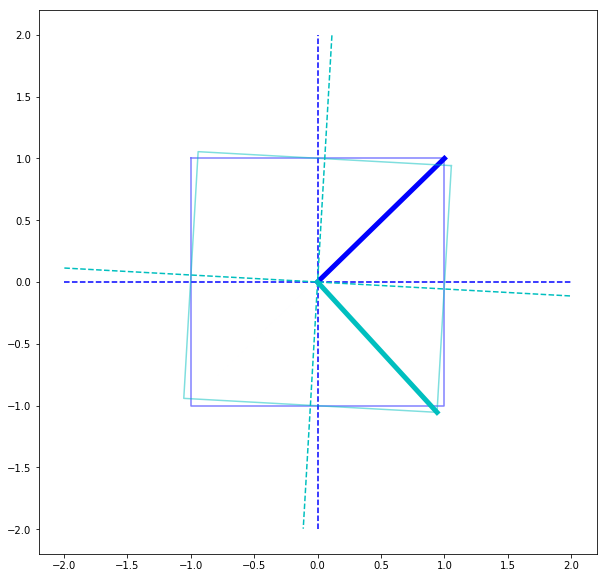

In [22]:

import time
#for i in range(1,90,10):    
#    lt=Linear_Transform(angle=i)
#    time.sleep(.1)
phi=np.deg2rad(25)
matrix1=np.array([[math.cos(phi),math.sin(phi)],
                [-math.sin(phi),math.cos(phi)]])
matrix2=np.array([[1 , 1],
                 [0 , 1]])
matrix3=np.array([[1 , 1],
                 [1 , 1]])
matrix4=np.array([[1 , 1],
                 [1 , 2]])
vect=[[0,0],
      [1,1]]
#vect=[[1,1]]
vect=np.array(vect,dtype=np.float64)
mats = [matrix1,matrix2,matrix3,matrix4]
#for mat in mats:
    #lt=Linear_Transform(vect,mat)
def func_1(a,b):
    #print('func : ix=1+0.1*x ')
    ret=1#+0.1*a#ix = 1+0.1*x
    return ret
def func_2(a,b):
    #print('func : iy=1+np.sin(x)')
    ret=0.0*a+np.sin(0.*a)
    return ret
def func_3(a,b):
    #print('func : iy=1+np.sin(x)')
    ret=1+.1*a+np.sin(.1*b)
    return ret
def func_4(a,b):
    phi=0.4*np.sqrt(a**2+b**2)
    #phi=np.deg2rad(25)
    mat=np.array([[math.cos(phi),math.sin(phi)],
                     [-math.sin(phi),math.cos(phi)]])
    return mat
def func_5(a,b):
    a=0.1
    b=0.1
    phi=0.4*np.sqrt(a**2+b**2)
    #phi=np.deg2rad(25)
    mat=np.array([[-math.sin(phi),math.cos(phi)],
                     [-math.cos(phi),-math.sin(phi)]])
    return mat
def matrix_nl(x,y):
    ix=func_3(x,y)
    iy=0
    jx=0
    jy=func_3(y,x)
    mat=np.array([[ix, jx],
                  [iy ,jy]])
    return mat
lt=Linear_Transform(vect,func_4)
lt1=Linear_Transform(vect,func_5)
#lt.Xaxis

In [17]:
l1=np.array([[1,2,3],[7,8,9]])
l2=np.array([[4,5,6]])
np.concatenate((l1,l2))

array([[1, 2, 3],
       [7, 8, 9],
       [4, 5, 6]])

In [18]:
matrix_nl(vect[:,0],vect[:,1])

array([[array([1.        , 1.19983342]), 0],
       [0, array([1.        , 1.19983342])]], dtype=object)

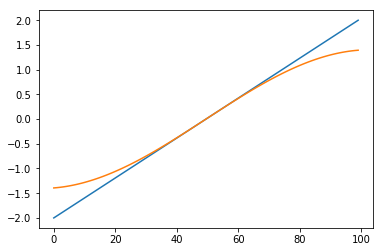

In [19]:
plt.plot(lt.Xaxis[:,0])
plt.plot(lt.TXaxis[:,0])
#lt.TXaxis

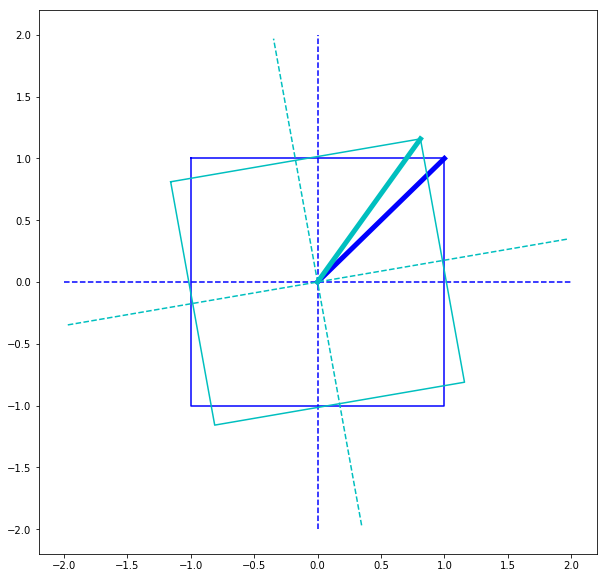

In [51]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
#ax.imshow(frame)
ax.plot(points[:,0],points[:,1],color='b')
ax.plot(ax1[:,0],ax1[:,1],'b--',)
ax.plot(ax2[:,0],ax2[:,1],'b--')
ax.plot(vect[:,0],vect[:,1],'b',linewidth=5)

ax.plot(rax1[:,0],rax1[:,1],'c--')
ax.plot(rax2[:,0],rax2[:,1],'c--')
ax.plot(rpoints[:,0],rpoints[:,1],color='c')
ax.plot(rvect[:,0],rvect[:,1],'c',linewidth=5)


#ax.plot(points[:,0],points[:,1])
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [53]:
np.mean(points,axis=0)

array([   0.,  100.,    0., -100.,    0.])

In [54]:
points

array([[-100.,  100.],
       [ 100.,  100.],
       [ 100., -100.],
       [-100., -100.],
       [-100.,  100.]])

In [ ]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib tk
angle=10
class point():
    def __init__():
        self.x=0.0
        self.y=0.0
class Line():
    def __init__(point1,point2):
        self.p1x,self.p1y,self.p2x,self.p2y
class PolyLine():
    def __init__(Lines):
        for Line in Lines()
class Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=4
        self.gy=4
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=vect
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
        
    def Draw(self):
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        for xx,yy in zip(self.Xs,self.Ys):
            #print(xx)
            self.ax.plot(xx[:,0],xx[:,1],marker+'--')
            self.ax.plot(yy[:,0],yy[:,1],marker+'--')
        
        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        for txx,tyy in zip(self.txx,self.tyy):
            self.ax.plot(txx[:,0],txx[:,1],marker+'--')
            self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        plt.show()

    
    def _Box(self):
        cx=self.ox
        cy=self.oy
        dx=1
        dy=1
        pts=[[cx-dx,cy+dy],
        [cx+dx,cy+dy],
        [cx+dx,cy-dy],
        [cx-dx,cy-dy],
        [cx-dx,cy+dy]]
        self.box=np.array(pts,dtype=np.float64)
        return self.box
    def _Axis(self):
        cx=self.ox
        cy=self.oy
        gx=self.gx
        gy=self.gy
        ax1=[[cx-gx//2,cy],
        [cx+gx//2,cy]]
        ax2=[[cx,cy-gy//2],
        [cx,cy+gy//2]]
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        gx=self.gx
        gy=self.gy
        for i in range(self.gx+1):
            ax1=[[self.ox-gx//2,_y],
                 [self.ox+gx//2,_y]]
            self.Xs.append(ax1)
            _y+=1
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-gy//2],
                 [_x,self.oy+gy//2]]
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def mul_pts(self,source):
        points=source.copy()
        for i in range(len(points)):
            points[i]=points[i].dot(self.matrix)
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts(self.vect)
            self.tbox=self.mul_pts(self.box)
            self.TXaxis=self.mul_pts(self.Xaxis)
            self.TYaxis=self.mul_pts(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts(_xx))
                self.tyy.append(self.mul_pts(_yy))
            

            return 0